# Lecture 6

Apro dei dati da una file csv ( _comma separated variables_ )

In [1]:
dati <- read.table("datasets/dati.csv", header=TRUE, sep=";")

In [2]:
str(dati)

'data.frame':	473 obs. of  10 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender  : int  1 1 0 0 1 1 1 0 0 0 ...
 $ educ    : int  15 16 12 8 15 15 15 12 15 12 ...
 $ jobcat  : int  3 1 1 1 1 1 1 1 1 1 ...
 $ salary  : int  57000 40200 21450 21900 45000 32100 36000 21900 27900 24000 ...
 $ salbegin: int  27000 18750 12000 13200 21000 13500 18750 9750 12750 13500 ...
 $ jobtime : int  98 98 98 98 98 98 98 98 98 98 ...
 $ prevexp : int  144 36 381 190 138 67 114 0 115 244 ...
 $ minority: int  0 0 0 0 0 0 0 0 0 0 ...
 $ age     : int  42 36 65 47 39 36 38 28 48 48 ...


La funzione ```attach``` serve per attaccare il database al path di R. Serve per evitare che io debba usare 

In [3]:
attach(dati)

In [4]:
dati$gender <- factor(dati$gender)

In [5]:
dati$jobcat <- factor(dati$jobcat)
levels(dati$jobcat) <- c("Impeiegato", "Intermedio", "Dirigente")
dati$jobcat <- ordered(dati$jobcat)

In [6]:
dati$minority <- factor(dati$minority)
levels(dati$minority) <- c("Non Appartiene", "Appartiene")

In [7]:
str(dati)

'data.frame':	473 obs. of  10 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender  : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 2 1 1 1 ...
 $ educ    : int  15 16 12 8 15 15 15 12 15 12 ...
 $ jobcat  : Ord.factor w/ 3 levels "Impeiegato"<"Intermedio"<..: 3 1 1 1 1 1 1 1 1 1 ...
 $ salary  : int  57000 40200 21450 21900 45000 32100 36000 21900 27900 24000 ...
 $ salbegin: int  27000 18750 12000 13200 21000 13500 18750 9750 12750 13500 ...
 $ jobtime : int  98 98 98 98 98 98 98 98 98 98 ...
 $ prevexp : int  144 36 381 190 138 67 114 0 115 244 ...
 $ minority: Factor w/ 2 levels "Non Appartiene",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ age     : int  42 36 65 47 39 36 38 28 48 48 ...


-----
## Boxcar

Il boxcar mette in evidenza 3 punti, il primo quartile, il terzo e il massimo.

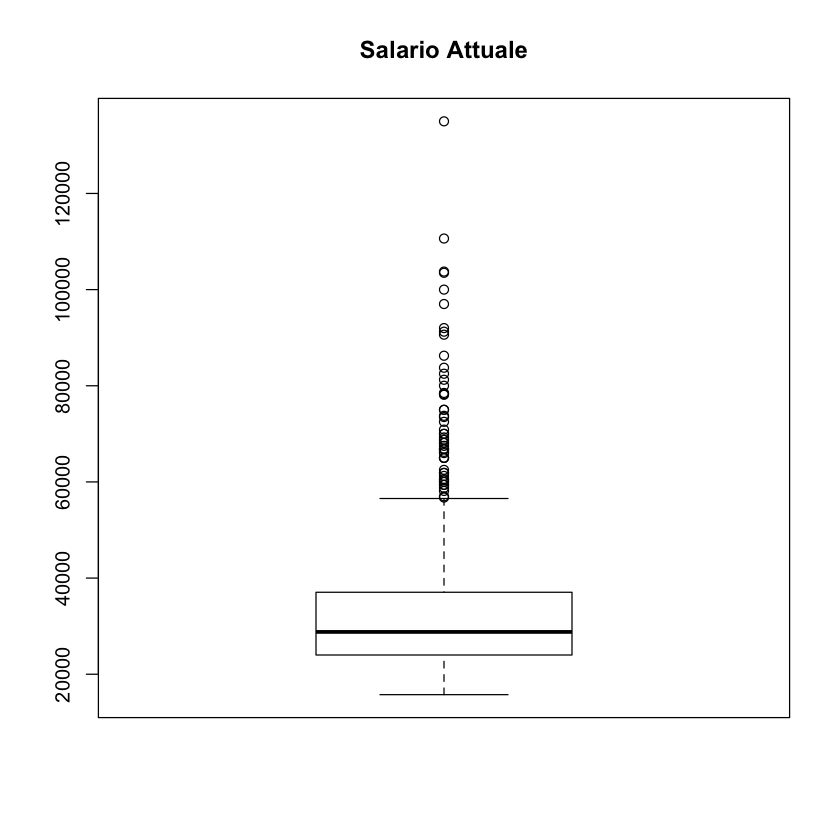

In [8]:
boxplot(salary, main="Salario Attuale")

La linea tratteggiata à la distanza tra l'inizio e la fine della scatola. La riga più in alto è la fine del boxcar. Gli _outliers_ sono evidenziati dai pallini. 

E' il grafico più semplice che si può fare.

Usiamo qua di seguito la stessa funziona ma da un pacchetto differente.

In [9]:
library(car)

Loading required package: carData


[1] "29"  "32"  "18"  "343" "445" "103" "34"  "106" "453" "431"

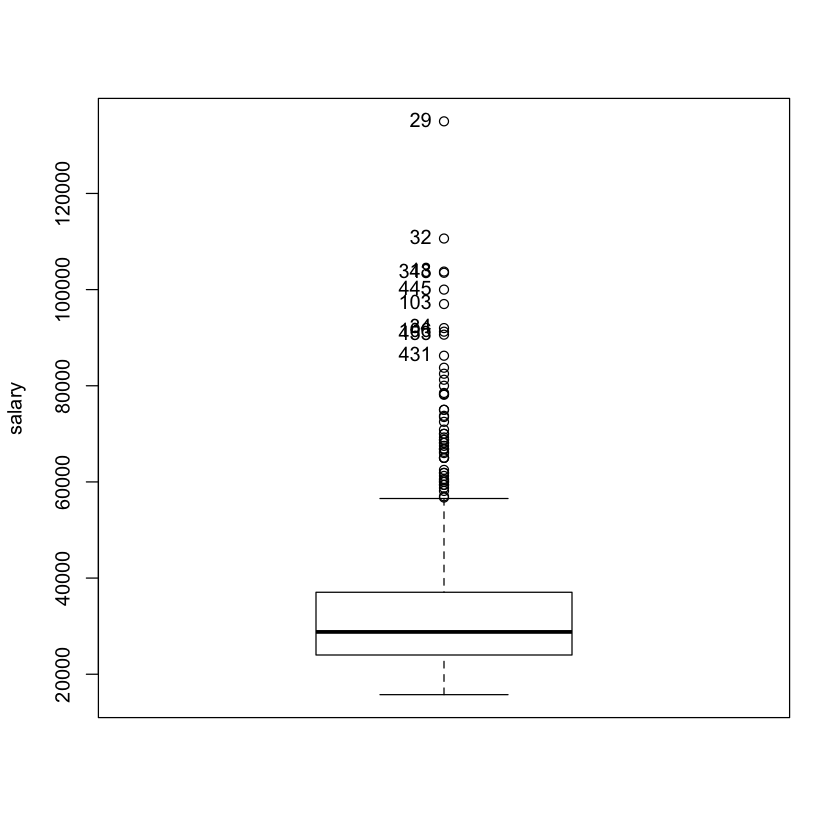

In [10]:
Boxplot(~ salary, id.method="salary")

In questo modo vado a vedere i 10 valori più elevati - i 10 outlier maggiori.

[1] "1"   "18"  "27"  "29"  "32"  "34"  "35"  "50"  "53"  "66"  "71"  "88" 
[13] "89"  "100" "101" "103" "106" "129" "130" "137" "160" "173" "187" "198"
[25] "200" "205" "218" "235" "254" "257" "272" "274" "283" "284" "289" "329"
[37] "341" "343" "348" "371" "383" "387" "389" "406" "408" "420" "430" "431"
[49] "445" "448" "453" "455" "457"

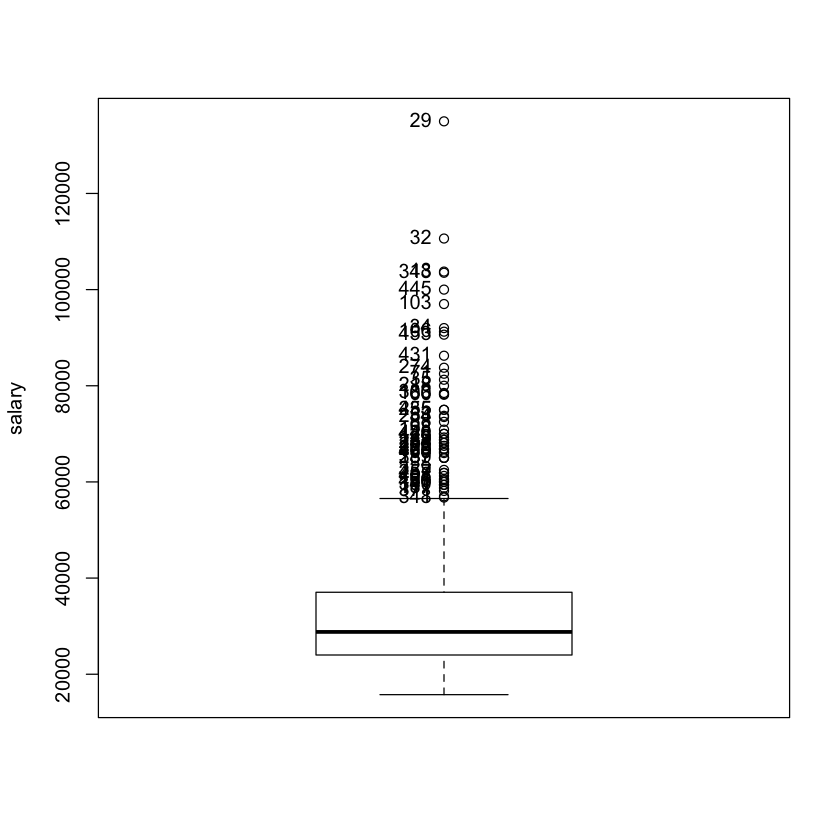

In [11]:
Boxplot(~ salary, id=list(n=Inf))

Prova a etichettare tutti gli outlier. Ce ne sono talmente tanti che non ha senso, in questo caso.

[1] "130" "137" "173"

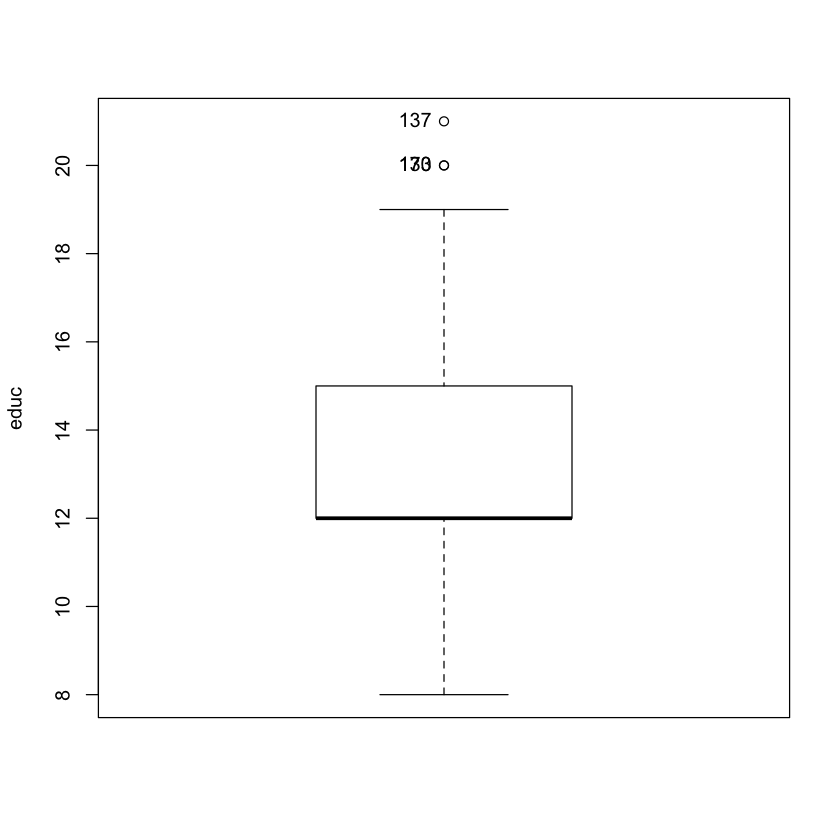

In [12]:
Boxplot(~ educ, id=list(n=Inf))

[1] "130" "137" "173"

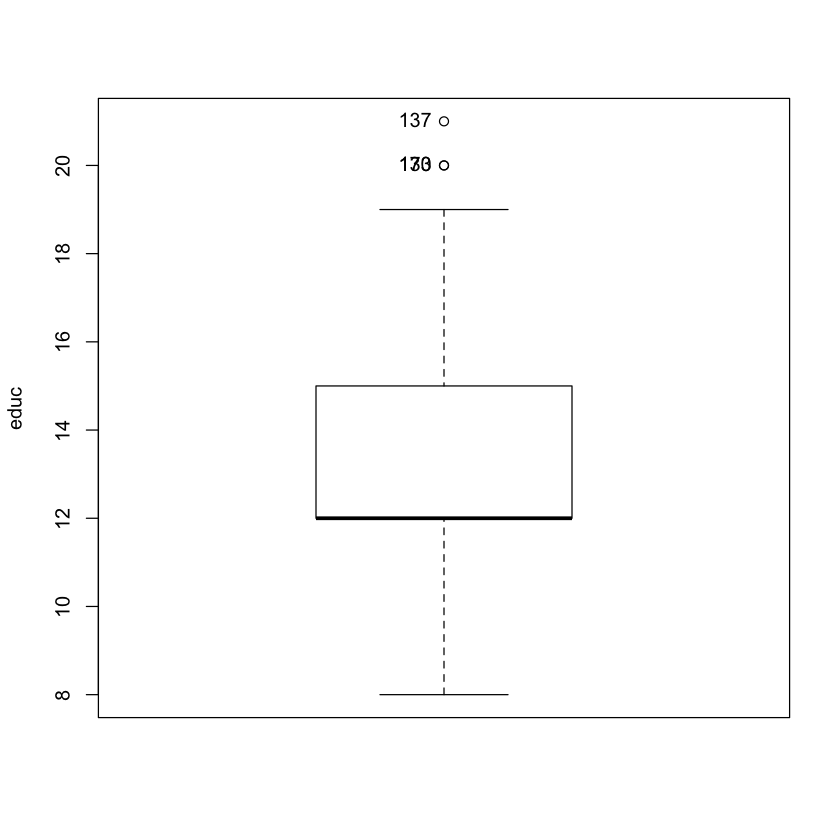

In [13]:
Boxplot(~ educ, id.method="identity")

`list(methods="...")` e `method="..."` sono identici. Con quest'ultima tenica posso usare il mouse per andare a identificare - grafico interattivo.

--------
-------

Come detto, la funzioe `min` e `max` richiamano il minimo e il massimo per una certa categoria.

In [14]:
min(salary)
max(salary)

[1] 15750

[1] 135000

In [15]:
campo_variazionale  <- max(salary) - min(salary)

In [16]:
print(campo_variazionale)

[1] 119250


Ho appena calcolato la differenza tra il valore massimo e minomo dei salati (in dollari, in questo caso)

La **mediana** si calcola con la funzione `median`.

In [17]:
median(salary)

[1] 28800

È il salario dell'unità statistica che lascia prima di sé il 50% della distribuzione e dopo di sé il 50% rimanente. In questo caso, poiché la distribuzione è dispari, prende il numero in mezzo.

In [18]:
quantile(salary)

0%    25%    50%    75%   100% 
 15750  24000  28800  37050 135000

Il comando `quantile` divide la distribuzione in tutti i 5 quantili della distribuzione (ovvero minimo, primo quantile, mediana, quarto quantile, e massimo)

In [19]:
quantile(salary, probs=c(0.1, 0.3, 0.8))

10%   30%   80% 
21030 24840 40980

In questo modo si possono chiamare i differenti quantili.

Per la **media aritmetica** si usa la formula `mean`

In [20]:
mean(salary)

[1] 34418.45

Questa funzione non funziona in caso ci siano dei `NaN`. In tal caso, si deve dire di ignorare i valori mancanti.

In [21]:
mean(salary, na.rm=TRUE)

[1] 34418.45

Esiste anche la funzione che calcola la **media troncata**: si specifica quanti valori si deve buttare (metà in basso e metà in alto)

In [22]:
mean(salary, trim=0.2)

[1] 29561.89

La funzione `summary` rimanda, per distribuzioni qualitative, le frequenze. Nel caso invece di variabili quantitavie, rimanda gli _indici di posizione_.

In [23]:
str(dati)

'data.frame':	473 obs. of  10 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ gender  : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 2 1 1 1 ...
 $ educ    : int  15 16 12 8 15 15 15 12 15 12 ...
 $ jobcat  : Ord.factor w/ 3 levels "Impeiegato"<"Intermedio"<..: 3 1 1 1 1 1 1 1 1 1 ...
 $ salary  : int  57000 40200 21450 21900 45000 32100 36000 21900 27900 24000 ...
 $ salbegin: int  27000 18750 12000 13200 21000 13500 18750 9750 12750 13500 ...
 $ jobtime : int  98 98 98 98 98 98 98 98 98 98 ...
 $ prevexp : int  144 36 381 190 138 67 114 0 115 244 ...
 $ minority: Factor w/ 2 levels "Non Appartiene",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ age     : int  42 36 65 47 39 36 38 28 48 48 ...


In [24]:
summary(dati$gender)

0   1 
216 257

In [25]:
summary(dati$minority)

Non Appartiene     Appartiene 
           369            104

In [26]:
summary(dati)

       id        gender       educ              jobcat        salary      
 Min.   :  1.0   0:216   Min.   : 8.00   Impeiegato:362   Min.   : 15750  
 1st Qu.:119.0   1:257   1st Qu.:12.00   Intermedio: 27   1st Qu.: 24000  
 Median :237.0           Median :12.00   Dirigente : 84   Median : 28800  
 Mean   :237.1           Mean   :13.49                    Mean   : 34418  
 3rd Qu.:355.0           3rd Qu.:15.00                    3rd Qu.: 37050  
 Max.   :474.0           Max.   :21.00                    Max.   :135000  
    salbegin        jobtime         prevexp                 minority  
 Min.   : 9000   Min.   :63.00   Min.   :  0.00   Non Appartiene:369  
 1st Qu.:12450   1st Qu.:72.00   1st Qu.: 19.00   Appartiene    :104  
 Median :15000   Median :81.00   Median : 55.00                       
 Mean   :17009   Mean   :81.14   Mean   : 95.95                       
 3rd Qu.:17490   3rd Qu.:90.00   3rd Qu.:139.00                       
 Max.   :79980   Max.   :98.00   Max.   :476.00  

La variabilità si misura con la **varianza** e la si calcola con lo **scarto quadratico medio**. In `R` esiste la funzione `var`.

In [27]:
var_c  <- var(salary)

In [28]:
print(var_c)

[1] 292195368


Vedremo formalmente, la _varianza campionaria_ viene stimata in maniera diversa rispetto alla varianza sulla popolazione. La funzione `var` viene calcolata come _varianza campionaria_, ovvero diviso da $N-1$.

In [29]:
sd_c = sd(salary)

In [30]:
print(sd_c)

[1] 17093.72


In realtà, si va a usare la varianza campionaria corretta.

Si mostra come fare una funzione per calcolare la varianza $\sigma^2$.

In [31]:
sigma2_1  <- function(x)
    {
        var(x)*(length(x)-1)/length(x)
    }

In [32]:
sigma2_1_salary  <- sigma2_1(salary)
print(sigma2_1_salary)

[1] 291577618


In [33]:
sigma2_2 <- function(x)
    {
        mean((x-mean(x))^2)
    }

In [34]:
sigma2_2(salary) == sigma2_1(salary)

[1] TRUE

Mostriamo ora una funzione che calcola il **coeffiente di variazione**.

In [35]:
cv <- function(x)
    {
        sqrt(sigma2_2(x))/abs(mean(x))
    }

In [36]:
cv_salary <- cv(salary)
print(cv_salary)

[1] 0.496119


## Analisi bivariata

Vediamo come costruire una tabella a doppia entrata.

In [37]:
table <- table(gender, jobcat)
print(table)

      jobcat
gender   1   2   3
     0 206   0  10
     1 156  27  74


Vediamo come calcolare il $\chi^2$.

In [38]:
chisq.test(table)


	Pearson's Chi-squared test

data:  table
X-squared = 79.713, df = 2, p-value < 2.2e-16


Non stiamo calcolando il $\chi^2$ normalizzato. Questo in particolare varia tra 0 e 473.
Se volessi normalizzarlo, si dovrebbe ricavare il $\chi^2$.

In [39]:
chi <- chisq.test(table)

In [40]:
chi$statistic

X-squared 
   79.713

In [41]:
chi_norm <- chi$statistic/(nrow(dati)*min(nrow(table)-1,ncol(table)-1))
print(chi_norm)

X-squared 
0.1685264 


In [42]:
chi$residuals

      jobcat
gender         1         2         3
     0  3.164672 -3.511383 -4.578901
     1 -2.901276  3.219130  4.197798

Sono le **contingenze di indipendenza**. Se si vuole il contributo di ogni cella, si usa `stdres`, e si ha quindi le *contingenze*, che si annullano.

In [43]:
chi$stdres

      jobcat
gender         1         2         3
     0  8.862614 -4.905749 -6.849849
     1 -8.862614  4.905749  6.849849

Vediamo come ricavare le marginali da una tabella, usando una libreria apposita.

In [44]:
margin.table(table,1)

gender
  0   1 
216 257 

In [45]:
margin.table(table,2)

jobcat
  1   2   3 
362  27  84 

Vediamo come calcolare le frequenze relative, sul totale.

In [46]:
prop.table(table)

      jobcat
gender          1          2          3
     0 0.43551797 0.00000000 0.02114165
     1 0.32980973 0.05708245 0.15644820

In [47]:
prop.table(table,1)

      jobcat
gender         1         2         3
     0 0.9537037 0.0000000 0.0462963
     1 0.6070039 0.1050584 0.2879377

Ho ottenuto con quest'ultima funzione

Ha mostrato come calcolare gli **hots ratios**. Me lo sono perso.

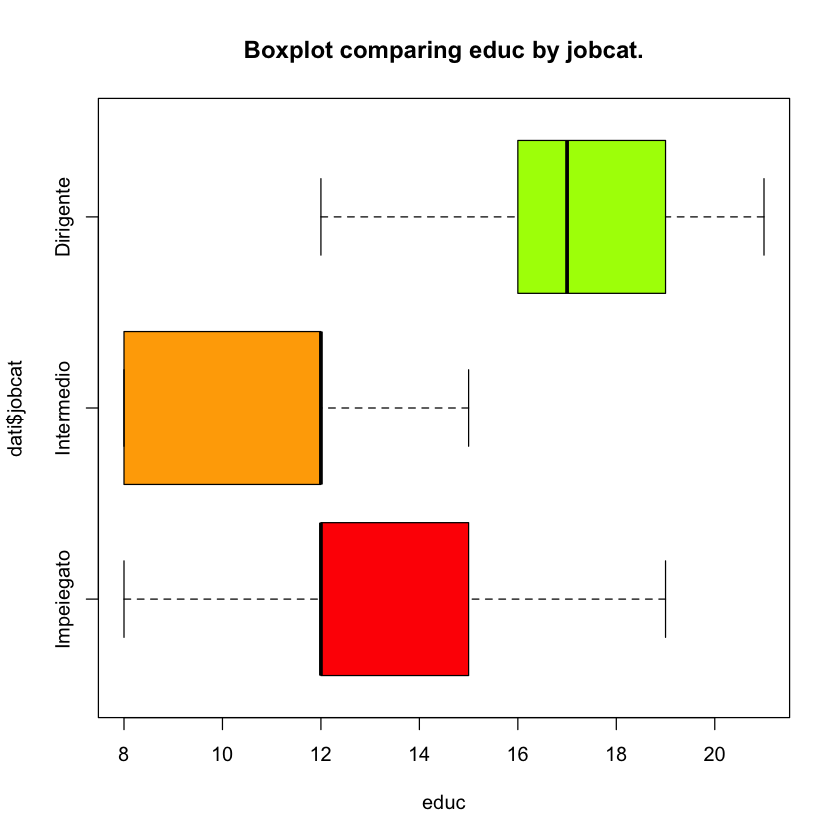

In [48]:
boxplot(educ ~ dati$jobcat, main='Boxplot comparing educ by jobcat.',
       col=rainbow(9),
        horizontal=TRUE)

Il comando `horizontal` allarga in modo tale che si legga meglio.

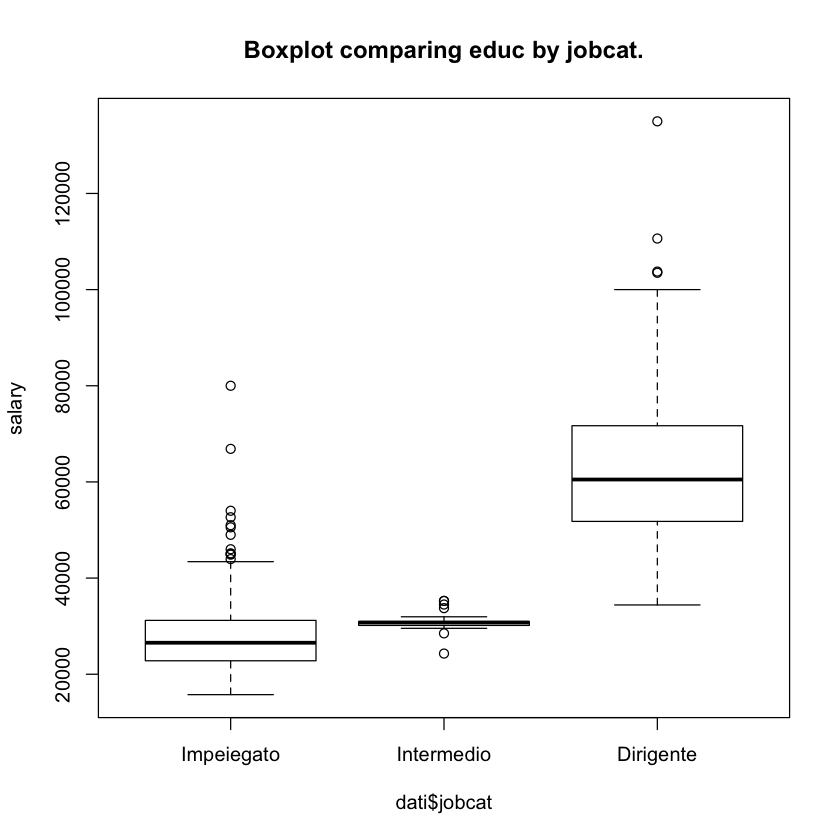

In [49]:
boxplot(salary ~ dati$jobcat, main='Boxplot comparing educ by jobcat.')

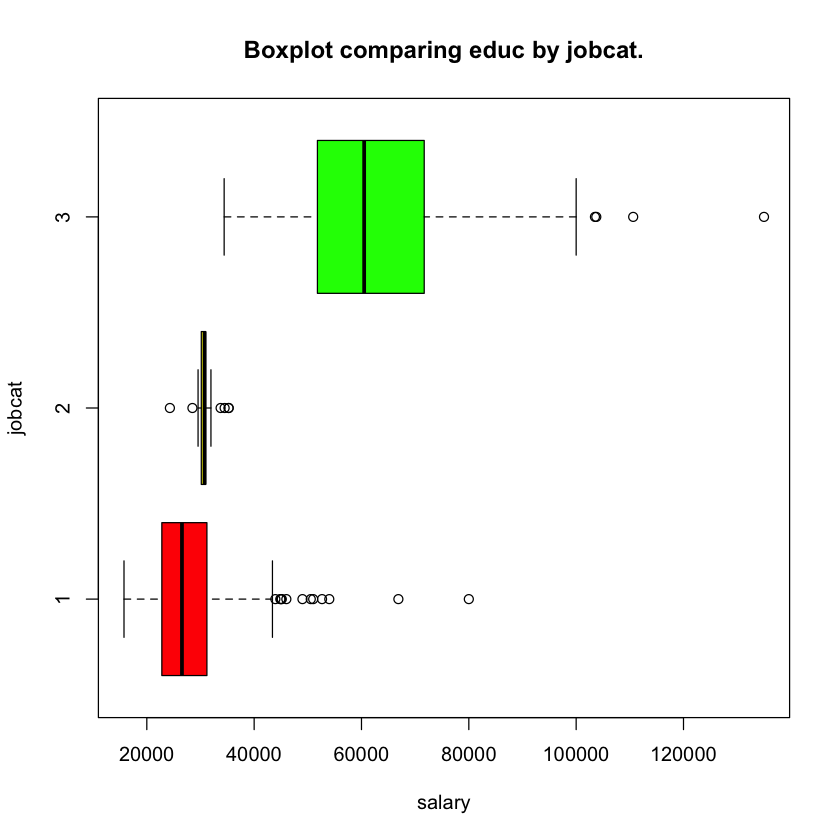

In [50]:
boxplot(salary ~ jobcat, main='Boxplot comparing educ by jobcat.',
       col=rainbow(6),
       horizontal=TRUE)

Vado ad aggregare rispetto al genere i salari. Ci possono essere diverse funzioni.

In [51]:
means <- aggregate(dati$salary, by=list(dati$gender), mean)
variances <- aggregate(dati$salary, by=list(dati$gender), var)
sdeviations <- aggregate(dati$salary, by=list(dati$gender), sd)

In [52]:
c(means, variances, sdeviations)

$Group.1
[1] 0 1
Levels: 0 1

$x
[1] 26031.92 41467.04

$Group.1
[1] 0 1
Levels: 0 1

$x
[1]  57123688 381539305

$Group.1
[1] 0 1
Levels: 0 1

$x
[1]  7558.021 19533.031

In [53]:
library(tables)

ERROR: Error in library(tables): there is no package called ‘tables’


In [54]:
table <- tabular(salary + salbegin + educ ~ jobcat*(mean+sd+length), data=dati)

ERROR: Error in tabular(salary + salbegin + educ ~ jobcat * (mean + sd + length), : could not find function "tabular"


## Correlazione

In [55]:
cor(salary, educ)

[1] 0.661032

In [56]:
cor(educ, salary)

[1] 0.661032

----

------

-----

-----

-----

In [58]:
anscombe <- read.table("datasets/dati_anscombe.csv", header=TRUE, sep=';')

In [59]:
attach(anscombe)
print(anscombe)

   x1    y1 x2   y2 x3    y3 x4    y4
1  10  8.04 10 9.14 10  7.46  8  6.58
2   8  6.95  8 8.14  8  6.77  8  5.76
3  13  7.58 13 8.74 13 12.74  8  7.71
4   9  8.81  9 8.77  9  7.11  8  8.84
5  11  8.33 11 9.26 11  7.81  8  8.47
6  14  9.96 14 8.10 14  8.84  8  7.04
7   6  7.24  6 6.13  6  6.08  8  5.25
8   4  4.26  4 3.10  4  5.39 19 12.50
9  12 10.84 12 9.13 12  8.15  8  5.56
10  7  4.82  7 7.26  7  6.42  8  7.91
11  5  5.68  5 4.74  5  5.73  8  6.89


In [60]:
cor(x1, y1)
cor(x2, y2)

[1] 0.8164205

[1] 0.8162365

In [61]:
lm(y1~x1)
lm(y2~x2)


Call:
lm(formula = y1 ~ x1)

Coefficients:
(Intercept)           x1  
     3.0001       0.5001  



Call:
lm(formula = y2 ~ x2)

Coefficients:
(Intercept)           x2  
      3.001        0.500  


La funzione `lm` calcola la **regressione lineare**.

Vediamo come fare 4 plot insieme e salvarli come file pdf.

In [62]:
pdf("rplot.pdf")
par(mfrow=c(2,2))
plot(x1,y1)
abline(lm(y1~x1), col="red")
plot(x2,y2)
abline(lm(y2~x2), col="blue")
plot(x3,y3)
abline(lm(y3~x3), col="green")
plot(x4,y4)
abline(lm(y4~x4), col="yellow")
dev.off()

pdf 
  2